### Demonstration of 'Central Limit Theorem' for RDPGs

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.linalg import orthogonal_procrustes

PLOT_DIR = "./plots/background/"

In [10]:
def generate_rdpg(mu1, mu2, n, seed=0):
    np.random.seed(seed)
    Z = np.random.choice([0, 1], size=n)
    X = np.array([mu1 if z == 0 else mu2 for z in Z])
    P = np.clip(X @ X.T, 0, 1)
    A = np.triu((np.random.rand(n, n) < P).astype(int), 1)
    A += A.T
    return A, X, Z

def adjacency_spectral_embedding(A, d=2):
    eigvals, eigvecs = np.linalg.eigh(A)
    top_indices = np.argsort(np.abs(eigvals))[::-1][:d]
    S = np.diag(np.abs(eigvals[top_indices]))
    U = eigvecs[:, top_indices]
    return U @ np.sqrt(S)

def plot_density(ax, points, labels, contour=True):
    ax.scatter(points[:, 0], points[:, 1], c=labels, cmap='coolwarm', alpha=0.5, s=10)

    x_min, x_max = points[:, 0].min(), points[:, 0].max()
    y_min, y_max = points[:, 1].min(), points[:, 1].max()
    padding = 0.1  # Add some padding for better visibility

    x, y = np.mgrid[
        x_min - padding : x_max + padding : 100j,
        y_min - padding : y_max + padding : 100j,
    ]
    pos = np.dstack((x, y))
    if contour:
        for label in np.unique(labels):
            cluster_points = points[labels == label]
            mu = np.mean(cluster_points, axis=0)
            cov = np.cov(cluster_points.T)
            rv = multivariate_normal(mean=mu, cov=cov)
            ax.contour(x, y, rv.pdf(pos), colors='k', alpha=0.6)

    ax.set_title(f"n = {len(points)}")
    ax.set_aspect('equal')
    ax.axis('equal')
    ax.set_xlabel(r'$\hat{X}_1$')
    ax.set_ylabel(r'$\hat{X}_2$')





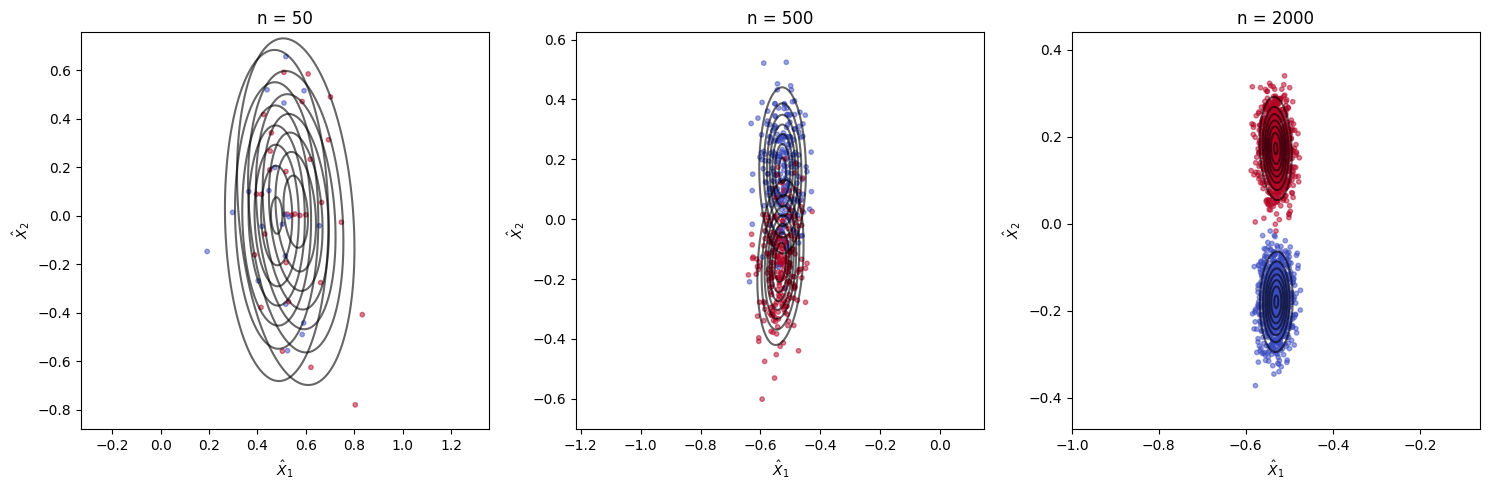

In [11]:
alpha = 0.25

mu1 = np.array([0.5, alpha])
mu2 = np.array([alpha, 0.5])

n_values = [50, 500, 2000]
fig, axes = plt.subplots(1, len(n_values), figsize=(15, 5))

for i, n in enumerate(n_values):
    # Generate random dot product graph
    np.random.seed(i)
    A, X_true, labels = generate_rdpg(mu1, mu2, n)
    
    # Perform adjacency spectral embedding
    U = adjacency_spectral_embedding(A)
    x, y = U[:, 0], U[:, 1]

    # Plot the results
    plot_density(axes[i], U, labels)
   
plt.tight_layout()
plt.savefig(PLOT_DIR + "rdpg_ase_n.png", dpi=300)
plt.show()

Note that the latent positions are only recovered up to an orthgonal transformation. The following code performs a Procrustes analysis to align the estimated latent positions with the true latent positions.

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


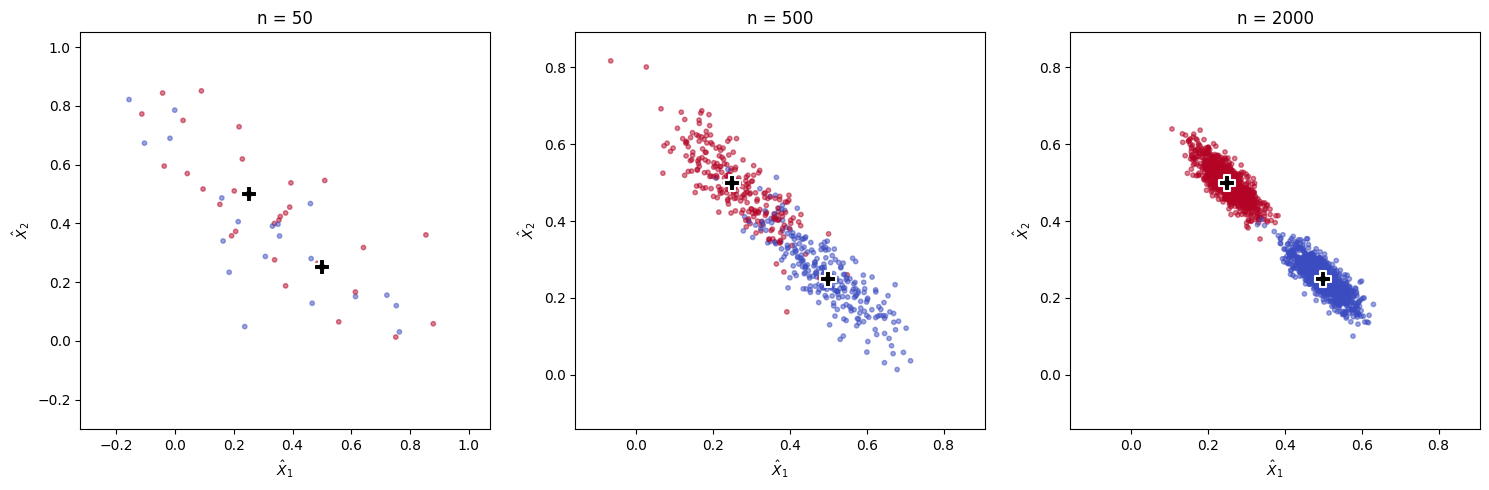

In [12]:
fig, axes = plt.subplots(1, len(n_values), figsize=(15, 5))
mid = ((mu1 + mu2) / 2)[0]

for i, n in enumerate(n_values):
    ax = axes[i]
    A, X_true, labels = generate_rdpg(mu1, mu2, n, seed=i)
    U = adjacency_spectral_embedding(A)
    R, _ = orthogonal_procrustes(U, X_true)  # Procrustes alignment
    U_aligned = U @ R
    plot_density(ax, U_aligned, labels, contour=False)

     # Plot cluster centres with larger, cleaner markers
    ax.scatter(*mu1, marker='P', s=120, color='black', edgecolor='white', linewidth=1.5, label=r'$\mu_1$')
    ax.scatter(*mu2, marker='P', s=120, color='black', edgecolor='white', linewidth=1.5, label=r'$\mu_2$')
    
    ax.set_ylim(mid-0.6, mid+0.6)
    ax.set_xlim(mid-0.6, mid+0.6)

plt.tight_layout()
plt.savefig(PLOT_DIR + "rdpg_ase_procrustes.png", dpi=300)
plt.show()